# 1. Load Libraries

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 2. Load Datasets & Plot Graphs

## (a) Stacked Bar Chart

### (i) StockOfForeignWorkforcebyPassType.csv

In [149]:
# read dataset
# https://beta.data.gov.sg/datasets/d_ca90ebca85472a1bf8fb01362b7233fa/view
fwp_df = pd.read_csv('Data/StockofForeignWorkforcebyPassType.csv')

fwp_df

,month,work_pass_type,count
0,2017-12,employment_pass,187700
1,2017-12,s_pass,184400
2,2017-12,work_permit,965200
3,2017-12,other_work_passes,30700
4,2018-12,employment_pass,"185,800"
5,2018-12,s_pass,"195,500"
6,2018-12,work_permit,972600
7,2018-12,other_work_passes,32100
8,2019-12,employment_pass,193700
9,2019-12,s_pass,200000


In [150]:
# check for missing values
fwp_df.isnull().sum()

month             0
work_pass_type    0
count             0
dtype: int64

In [151]:
# view dataset data types
fwp_df.info()

# change count to int
fwp_df['count'] = fwp_df['count'].str.replace(',', '').astype(int)

print(f'Datatype of count column after changing dtype: {fwp_df["count"].dtype}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   month           24 non-null     object
 1   work_pass_type  24 non-null     object
 2   count           24 non-null     object
dtypes: object(3)
memory usage: 708.0+ bytes
Datatype of count column after changing dtype: int32


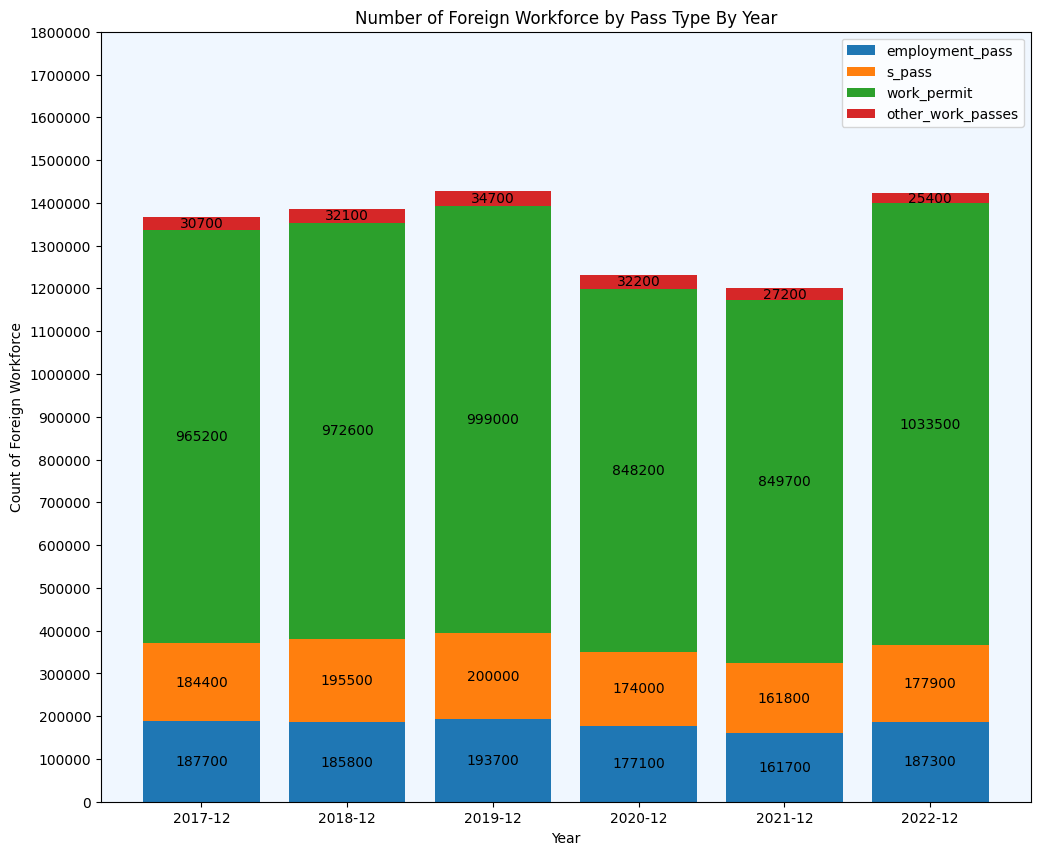

In [152]:
# initialise plotting data
passes = {}

for pass_type in ['employment_pass', 's_pass', 'work_permit', 'other_work_passes']:  # order of pass_type is important hence we used list
    passes[pass_type] = fwp_df[fwp_df['work_pass_type'] == pass_type]['count'].values

years = fwp_df[fwp_df['work_pass_type'] == 'employment_pass']['month'].values
bottom = np.zeros(len(passes['employment_pass']))  # set the base value for each year

# plot stacked barchart
fig, ax = plt.subplots(figsize=(12, 10))

for name, value in passes.items():
    bar = ax.bar(years, value, label=name, bottom=bottom)
    bottom += value  # add the value to set the base value for Medical

    ax.bar_label(bar, label_type='center', fmt='%d')  # %d to format labels to integers (not in scientific notation)

# customise plot
ax.ticklabel_format(style='plain', axis='y')  # remove scientific notation from y-axis
ax.set_yticks(np.arange(0, 1900000, 100000))
ax.set_xlabel('Year')
ax.set_ylabel('Count of Foreign Workforce')
ax.set_title('Number of Foreign Workforce by Pass Type By Year')
ax.legend()

# set background color
ax.set_facecolor((0,0.5,1,0.06))

plt.show()

## (b) Scatterplot + Regression With Outlier

### (i) LFR_T19

(Median Gross Monthly Income From Work of Employed Residents By Year)

In [153]:
# read dataset
# https://stats.mom.gov.sg/Pages/Labour-Force-In-Singapore-2022.aspx
mi_df = pd.read_excel('Data/LFR2022_T17_35.xlsx', sheet_name='T19')

# remove rows and columns that are not used
mi_df = mi_df.drop(columns=['Contents', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']).iloc[5:18]

# replace the NaN column headings with their respective column headings
mi_df.iloc[0] = 'Excluding Employer CPF'

# rename the index heading
mi_df.iloc[0, 0] = 'Year'

# reset index and drop the old index
mi_df = mi_df.reset_index().drop(columns='index')

mi_df.iloc[1, 0] = 'Year'

# set the first row to be the header
mi_df.columns = mi_df.iloc[0]

# remove the duplicative row
mi_df = mi_df.iloc[1:]

# set multi-index columns
multi_columns = [
    mi_df.columns[1:],
    mi_df.iloc[0].values[1:]
]

# initialise the dataframe with the multi-index columns and its respective index
mi_df = pd.DataFrame(mi_df.values[:,1:], columns=multi_columns, index=mi_df.iloc[:,0].values)

# set the index name
mi_df.index.name = mi_df.index[0]

# remove duplicative row
mi_df = mi_df.iloc[1:]

# change dtype of index to int
mi_df.index = mi_df.index.astype(int)

mi_df

0    Excluding Employer CPF                    
                      Total Full-Time Part-Time
Year                                           
2012                   2800      3000       800
2013                   3000      3250       800
2014                   3000      3276       827
2015                   3125      3467       850
2016                   3250      3500       938
2017                   3300      3749      1000
2018                   3467      3800      1000
2019                   3561      4000      1000
2020                   3573      4000      1000
2021                   3683      4000      1042
2022                   4083      4500      1200

In [154]:
# check for missing values
mi_df.isnull().sum()

Excluding Employer CPF  Total        0
                        Full-Time    0
                        Part-Time    0
dtype: int64

In [155]:
# view dataset data types
mi_df.info()

# change dtype of all columns to int
mi_df = mi_df.astype(int)

mi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2012 to 2022
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   (Excluding Employer CPF, Total)      11 non-null     object
 1   (Excluding Employer CPF, Full-Time)  11 non-null     object
 2   (Excluding Employer CPF, Part-Time)  11 non-null     object
dtypes: object(3)
memory usage: 352.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2012 to 2022
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   (Excluding Employer CPF, Total)      11 non-null     int32
 1   (Excluding Employer CPF, Full-Time)  11 non-null     int32
 2   (Excluding Employer CPF, Part-Time)  11 non-null     int32
dtypes: int32(3)
memory usage: 220.0 bytes


In [156]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# initialise plotting data
y = mi_df.iloc[5:]['Excluding Employer CPF']['Total'].values
x = []

for i in range(len(fwp_df)):
    if fwp_df.iloc[i, 1] == 'employment_pass':
        x.append(fwp_df.iloc[i, 2] + fwp_df.iloc[i+1, 2])  # add the count of employment pass and employment pass for each year

x = np.array(x)

# fit regression model
incomeModel = smf.ols("y ~ x", data={'x': x, 'y': y}).fit()

print(incomeModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                 -0.168
Method:                 Least Squares   F-statistic:                    0.2801
Date:                Mon, 05 Feb 2024   Prob (F-statistic):              0.625
Time:                        22:54:53   Log-Likelihood:                -41.227
No. Observations:                   6   AIC:                             86.45
Df Residuals:                       4   BIC:                             86.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4608.4279   1888.047      2.441      0.0

c:\Users\scrab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Text(0.5, 1.0, 'Boxplot of Employment Pass and S Pass Count')

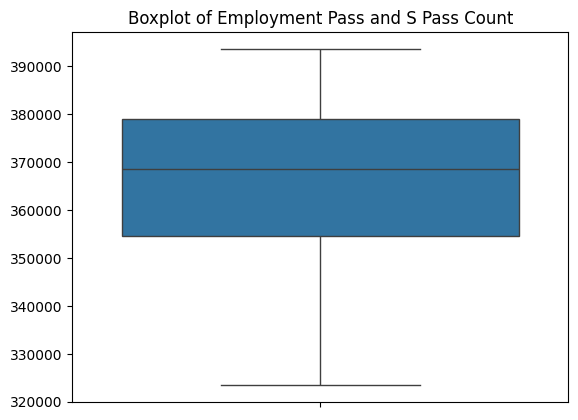

In [157]:
# # check for outliers in x
sns.boxplot(x)
plt.title('Boxplot of Employment Pass and S Pass Count')

Text(0.5, 1.0, 'Boxplot of Median Salary')

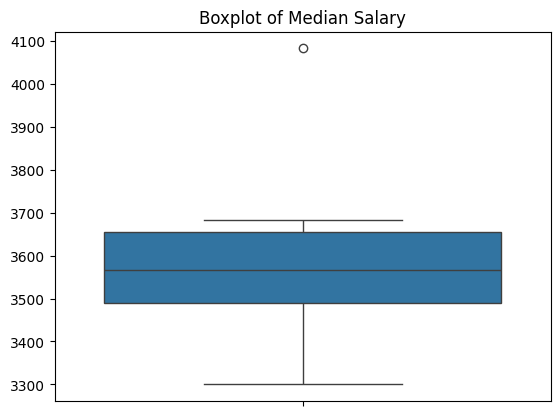

In [158]:
# check for outliers in y
sns.boxplot(y)
plt.title('Boxplot of Median Salary')

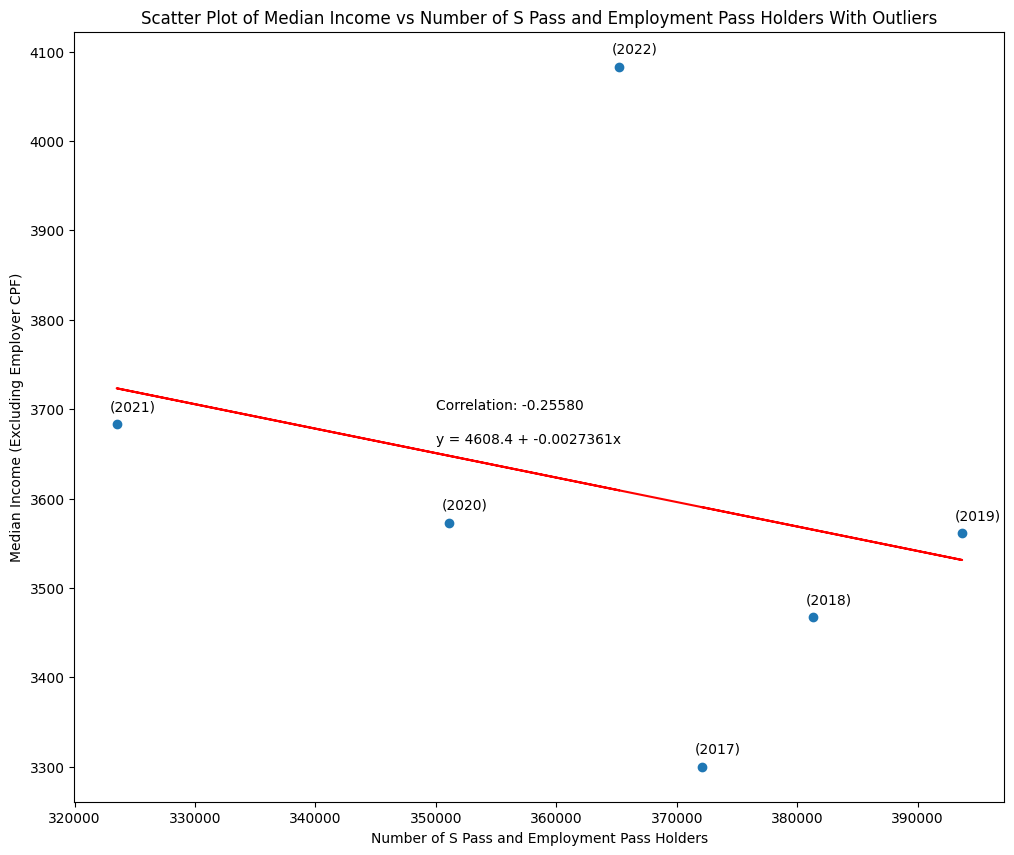

In [159]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x=x, y=y)

# plot line of best fit
m,c = np.polyfit(x, y, deg=1)
ax.plot(x, c+m*x, 'r-')

# annotations
# year
i = 0
for x_coord, y_coord in zip(x, y):
    ax.annotate(f"({mi_df['Excluding Employer CPF'].index[i+5]})", xy=(x_coord, y_coord), xytext=(-5, 10), textcoords='offset points')
    i += 1

# equation
equation = f"y = {incomeModel.params[0]:.5} + {incomeModel.params[1]:.5}x"
plt.annotate(equation, xy=(350000, 3700), xytext=(0,-25), textcoords='offset points')

# correlation score
correlation = f"Correlation: {pd.Series(y).corr(pd.Series(x)):.5f}"
plt.annotate(correlation, xy=(350000, 3700), xytext=(0,0), textcoords='offset points')

# customise plot
ax.set_xlabel('Number of S Pass and Employment Pass Holders')
ax.set_ylabel('Median Income (Excluding Employer CPF)')
ax.set_title('Scatter Plot of Median Income vs Number of S Pass and Employment Pass Holders With Outliers')

plt.show()

## (c) Scatterplot + Regression Without Outlier

In [160]:
filtered_x = np.delete(x, -1)
filtered_y = np.delete(y, -1)

# fit regression model
filteredIncomeModel = smf.ols("y ~ x", data={'x': filtered_x, 'y': filtered_y}).fit()

print(filteredIncomeModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.321
Date:                Mon, 05 Feb 2024   Prob (F-statistic):              0.334
Time:                        22:54:53   Log-Likelihood:                -30.451
No. Observations:                   5   AIC:                             64.90
Df Residuals:                       3   BIC:                             64.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4562.2939    911.599      5.005      0.0

c:\Users\scrab\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


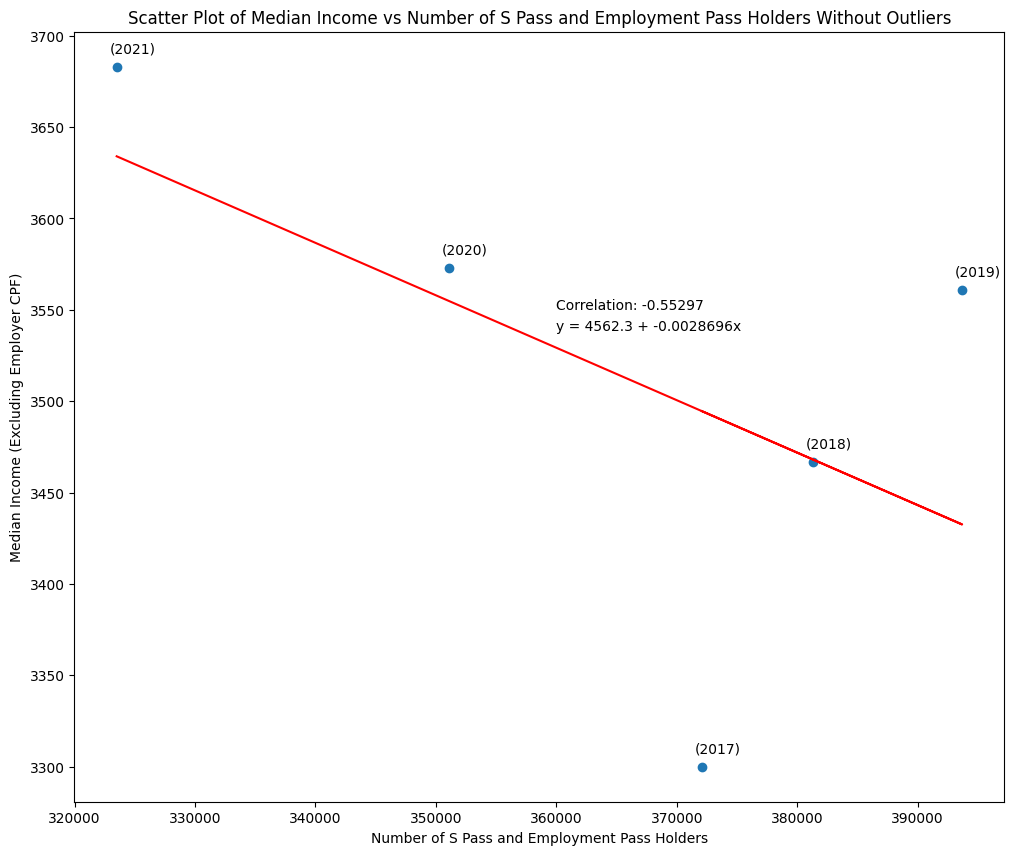

In [161]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x=filtered_x, y=filtered_y)

# plot line of best fit
m,c = np.polyfit(filtered_x, filtered_y, deg=1)
ax.plot(filtered_x, c+m*filtered_x, 'r-')

# annotations
# year
i = 0
for x_coord, y_coord in zip(filtered_x, filtered_y):
    ax.annotate(f"({mi_df['Excluding Employer CPF'].index[i+5]})", xy=(x_coord, y_coord), xytext=(-5, 10), textcoords='offset points')
    i += 1

# equation
equation = f"y = {filteredIncomeModel.params[0]:.5} + {filteredIncomeModel.params[1]:.5}x"
plt.annotate(equation, xy=(360000, 3550), xytext=(0,-15), textcoords='offset points')

# correlation score
correlation = f"Correlation: {pd.Series(filtered_y).corr(pd.Series(filtered_x)):.5f}"
plt.annotate(correlation, xy=(360000, 3550), xytext=(0,0), textcoords='offset points')

# customise plot
ax.set_xlabel('Number of S Pass and Employment Pass Holders')
ax.set_ylabel('Median Income (Excluding Employer CPF)')
ax.set_title('Scatter Plot of Median Income vs Number of S Pass and Employment Pass Holders Without Outliers')

plt.show()

## (d) Line and Bar Chart

### (i) MedianAgeofResidentLabourForceTotal.csv

In [162]:
# load dataset
# https://beta.data.gov.sg/datasets/d_65ae92a010c3ed637e098b52d9fe4413/view
ma_df = pd.read_csv('Data/MedianAgeofResidentLabourForceTotal.csv')
ma_df

,year,median_age
0,1991,34
1,1992,34
2,1993,35
3,1994,35
4,1996,36
5,1997,37
6,1998,37
7,1999,38
8,2001,38
9,2002,39


In [163]:
# check for missing values
ma_df.isnull().sum()

year          0
median_age    0
dtype: int64

In [164]:
# view dataset data types
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        29 non-null     int64
 1   median_age  29 non-null     int64
dtypes: int64(2)
memory usage: 596.0 bytes


### (ii) totalresidentsbyage2000.csv

In [165]:
# read dataset
# https://tablebuilder.singstat.gov.sg/table/CT/6354
tr_df = pd.read_csv('Data/totalresidentsbyage2000.csv')

# remove first few rows and remove columns that are not used
tr_df = tr_df[9:24]
tr_df = tr_df.iloc[:, :4]

# reset index and drop the old index
tr_df = tr_df.reset_index().drop(columns='index')

# replace the NaN column headings with their respective column headings
tr_df.iloc[0, 2] = tr_df.iloc[0, 1]
tr_df.iloc[0, 3] = tr_df.iloc[0, 1]
tr_df.iloc[1, 0] = tr_df.iloc[0, 0]

# set the first row to be the header
tr_df.columns = tr_df.iloc[0]

# remove the duplicative row
tr_df = tr_df.iloc[1:]

# set multi-index columns
multi_columns = [
    tr_df.columns[1:],
    tr_df.iloc[0].values[1:]
]

# initialise the dataframe with the multi-index columns and its respective index
df2000 = pd.DataFrame(tr_df.values[1:,1:], columns=multi_columns, index=tr_df.iloc[1:,0].values)

# set the index name
df2000.index.name = tr_df.columns[0]

df2000

0            Total                  
             Total    Males  Females
Age Group                           
Total      2494630  1229758  1264872
15 - 19     211495   110257   101239
20 - 24     201301   101775    99526
25 - 29     256733   122950   133783
30 - 34     280379   136475   143904
35 - 39     311100   156479   154622
40 - 44     304735   153014   151720
45 - 49     256906   128741   128165
50 - 54     204939   102467   102472
55 - 59     125039    61937    63102
60 - 64     110670    53469    57200
65 - 69      87600    41679    45921
70 & Over   143735    60516    83218

In [166]:
# check for missing values
df2000.isnull().sum()

Total  Total      0
       Males      0
       Females    0
dtype: int64

In [167]:
# view dataset data types
df2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Total to 70 & Over
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   (Total, Total)    13 non-null     object
 1   (Total, Males)    13 non-null     object
 2   (Total, Females)  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


### (iii) totalresidentsbyage2010.csv

In [168]:
# read dataset
# https://tablebuilder.singstat.gov.sg/table/CT/6354
tr_df = pd.read_csv('Data/totalresidentsbyage2010.csv')

# remove first few rows and remove columns that are not used
tr_df = tr_df[9:27]
tr_df = tr_df.iloc[:, :4]

# reset index and drop the old index
tr_df = tr_df.reset_index().drop(columns='index')

# replace the NaN column headings with their respective column headings
tr_df.iloc[0, 2] = tr_df.iloc[0, 1]
tr_df.iloc[0, 3] = tr_df.iloc[0, 1]
tr_df.iloc[1, 0] = tr_df.iloc[0, 0]

# set the first row to be the header
tr_df.columns = tr_df.iloc[0]

# remove the duplicative row
tr_df = tr_df.iloc[1:]

# set multi-index columns
multi_columns = [
    tr_df.columns[1:],
    tr_df.iloc[0].values[1:]
]

# initialise the dataframe with the multi-index columns and its respective index
df2010 = pd.DataFrame(tr_df.values[1:,1:], columns=multi_columns, index=tr_df.iloc[1:,0].values)

# set the index name
df2010.index.name = tr_df.columns[0]

# calculate total for 70 & Over
total = 0
males = 0
females = 0

for i in range(1, 5):
    total += int(df2010.iloc[-i, 0])
    males += int(df2010.iloc[-i, 1])
    females += int(df2010.iloc[-i, 2])

# drop rows
df2010 = df2010.drop(df2010.tail(4).index)

# add new row and rename it
df2010.loc[len(df2010)] = [total, males, females]
df2010 = df2010.rename(index={(len(df2010) - 1): '70 & Over'})

df2010

0            Total                  
             Total    Males  Females
Age Group                           
Total      3105748  1517428  1588321
  15 - 19   270986   140275   130711
  20 - 24   242360   124500   117860
  25 - 29   261431   126519   134913
  30 - 34   291687   137861   153826
  35 - 39   318212   153129   165083
  40 - 44   304016   148382   155634
  45 - 49   319916   159397   160519
  50 - 54   303727   151988   151739
  55 - 59   252926   127280   125647
  60 - 64   196418    96557    99861
  65 - 69   113609    54368    59241
70 & Over   230458    97172   133287

In [169]:
# check for missing values
df2010.isnull().sum()

Total  Total      0
       Males      0
       Females    0
dtype: int64

In [170]:
# view dataset data types
df2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Total to 70 & Over
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   (Total, Total)    13 non-null     object
 1   (Total, Males)    13 non-null     object
 2   (Total, Females)  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


### (iv) totalresidentsbyage2015.csv

In [171]:
# read dataset
# https://tablebuilder.singstat.gov.sg/table/CT/6354
tr_df = pd.read_csv('Data/totalresidentsbyage2015.csv')

# remove first few rows and remove columns that are not used
tr_df = tr_df[9:25]
tr_df = tr_df.iloc[:, :4]

# reset index and drop the old index
tr_df = tr_df.reset_index().drop(columns='index')

# replace the NaN column headings with their respective column headings
tr_df.iloc[0, 2] = tr_df.iloc[0, 1]
tr_df.iloc[0, 3] = tr_df.iloc[0, 1]
tr_df.iloc[1, 0] = tr_df.iloc[0, 0]

# set the first row to be the header
tr_df.columns = tr_df.iloc[0]

# remove the duplicative row
tr_df = tr_df.iloc[1:]

# set multi-index columns
multi_columns = [
    tr_df.columns[1:],
    tr_df.iloc[0].values[1:]
]

# initialise the dataframe with the multi-index columns and its respective index
df2015 = pd.DataFrame(tr_df.values[1:,1:], columns=multi_columns, index=tr_df.iloc[1:,0].values)

# set the index name
df2015.index.name = tr_df.columns[0]

# multiply each value by 1000
for i in range(len(df2015.columns)):
    df2015[df2015.columns[i]] = df2015[df2015.columns[i]].astype(float)
    df2015[df2015.columns[i]] = [value * 1000 for value in df2015[df2015.columns[i]].values]
    df2015[df2015.columns[i]] = df2015[df2015.columns[i]].astype(int)

# calculate total for 70 & Over
total = 0
males = 0
females = 0

for i in range(1, 3):
    total += int(df2015.iloc[-i, 0])
    males += int(df2015.iloc[-i, 1])
    females += int(df2015.iloc[-i, 2])

# drop rows
df2015 = df2015.drop(df2015.tail(2).index)

# add new row and rename it
df2015.loc[len(df2015)] = [total, males, females]
df2015 = df2015.rename(index={(len(df2015) - 1): '70 & Over'})

df2015

0            Total                  
             Total    Males  Females
Age Group                           
Total      3275900  1589600  1686300
  15 - 19   254600   131900   122700
  20 - 24   256800   132400   124400
  25 - 29   244300   119600   124700
  30 - 34   271200   127300   143900
  35 - 39   300500   140500   160000
  40 - 44   315600   151500   164100
  45 - 49   301600   146500   155000
  50 - 54   319400   159300   160100
  55 - 59   296700   148800   147900
  60 - 64   248200   123400   124800
  65 - 69   185700    88200    97500
70 & Over   281300   120200   161100

In [172]:
# check for missing values
df2015.isnull().sum()

Total  Total      0
       Males      0
       Females    0
dtype: int64

In [173]:
# view dataset data types
df2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Total to 70 & Over
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   (Total, Total)    13 non-null     int64
 1   (Total, Males)    13 non-null     int64
 2   (Total, Females)  13 non-null     int64
dtypes: int64(3)
memory usage: 416.0+ bytes


### (v) totalresidentsbyage2020.csv

In [174]:
# read dataset
# https://tablebuilder.singstat.gov.sg/table/CT/6354
tr_df = pd.read_csv('Data/totalresidentsbyage2020.csv')

# remove first few rows and remove columns that are not used
tr_df = tr_df[9:28].drop(index=11)
tr_df = tr_df.iloc[:, :4]

# reset index and drop the old index
tr_df = tr_df.reset_index().drop(columns='index')

# replace the NaN column headings with their respective column headings
tr_df.iloc[0, 2] = tr_df.iloc[0, 1]
tr_df.iloc[0, 3] = tr_df.iloc[0, 1]
tr_df.iloc[1, 0] = tr_df.iloc[0, 0]

# set the first row to be the header
tr_df.columns = tr_df.iloc[0]

# remove the duplicative row
tr_df = tr_df.iloc[1:]

# set multi-index columns
multi_columns = [
    tr_df.columns[1:],
    tr_df.iloc[0].values[1:]
]

# initialise the dataframe with the multi-index columns and its respective index
df2020 = pd.DataFrame(tr_df.values[1:,1:], columns=multi_columns, index=tr_df.iloc[1:,0].values)

# set the index name
df2020.index.name = tr_df.columns[0]

# calculate total for 70 & Over
total = 0
males = 0
females = 0

for i in range(1, 5):
    total += int(df2020.iloc[-i, 0])
    males += int(df2020.iloc[-i, 1])
    females += int(df2020.iloc[-i, 2])

# drop rows
df2020 = df2020.drop(df2020.tail(4).index)

# add new row and rename it
df2020.loc[len(df2020)] = [total, males, females]
df2020 = df2020.rename(index={(len(df2020) - 1): '70 & Over'})

df2020

0            Total                  
             Total    Males  Females
Age Group                           
Total      3459093  1663560  1795534
  15 - 19   218030   111663   106366
  20 - 24   240781   123657   117125
  25 - 29   287103   142027   145075
  30 - 34   298499   141496   157003
  35 - 39   298623   139484   159139
  40 - 44   298605   139205   159400
  45 - 49   311730   150934   160795
  50 - 54   294348   143505   150842
  55 - 59   306354   149740   156614
  60 - 64   286020   138929   147092
  65 - 69   229381   112404   116976
70 & Over   389620   170514   219106

In [175]:
# check for missing values
df2020.isnull().sum()

Total  Total      0
       Males      0
       Females    0
dtype: int64

In [176]:
# view dataset data types
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Total to 70 & Over
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   (Total, Total)    13 non-null     object
 1   (Total, Males)    13 non-null     object
 2   (Total, Females)  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


### (vi) LFR_T116

(Number of Residents Outside of Workforce By Age Group By Year)

In [177]:
# load dataset
# https://stats.mom.gov.sg/Pages/Labour-Force-In-Singapore-2022.aspx
lfr_t116 = pd.read_excel('Data/LFR2022_T116_128.xlsx', sheet_name='T116')

# remove rows and columns that are not used
lfr_t116 = lfr_t116.iloc[5:19, 1:]

# set NaN value to 'Total'
lfr_t116.iloc[0, 0] = 'Total'

# reset index and drop the old index
lfr_t116 = lfr_t116.reset_index().drop(columns='index')

# set the first row to be the header
lfr_t116.columns = lfr_t116.iloc[0]

# remove the duplicative row
lfr_t116 = lfr_t116.iloc[1:]

# set first column to index
lfr_t116 = lfr_t116.set_index('Total')

# multiply by 1000
for col in lfr_t116.columns:
    lfr_t116[col] = lfr_t116[col].multiply(1000)

# set all values to int
lfr_t116 = lfr_t116.astype(int)

# set all columns to int
lfr_t116.columns = lfr_t116.columns.astype(int)

lfr_t116

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Total,,,,,,,,,,,
Total,1063400,1067100,1074600,1034599,1060800,1083500,1093700,1093900,1100800,1004400,1046099
15 - 19,240000,234700,219900,213900,210300,210800,211200,203600,187800,154400,152100
20 - 24,98000,97600,99700,88300,98300,93200,95500,95300,106400,83700,86200
25 - 29,27400,27200,27000,23700,25700,25000,26200,26400,26300,26000,24400
30 - 34,27900,27400,28000,26400,24800,21700,23900,21000,21800,21700,19300
35 - 39,36200,35700,32400,32600,29700,31100,33400,30900,29000,27300,25700
40 - 44,45300,44500,39400,39000,35800,39500,35000,34500,33100,29000,34200
45 - 49,50000,49000,45800,42500,41100,41400,42400,39100,40100,35500,37500
50 - 54,64099,63800,57900,56300,59700,53000,56900,55200,54000,39600,48000


In [178]:
# check for missing values
lfr_t116.isnull().sum()

0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [179]:
# view dataset data types
lfr_t116.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Total to 70 & Over
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2012    13 non-null     int32
 1   2013    13 non-null     int32
 2   2014    13 non-null     int32
 3   2015    13 non-null     int32
 4   2016    13 non-null     int32
 5   2017    13 non-null     int32
 6   2018    13 non-null     int32
 7   2019    13 non-null     int32
 8   2020    13 non-null     int32
 9   2021    13 non-null     int32
 10  2022    13 non-null     int32
dtypes: int32(11)
memory usage: 676.0+ bytes


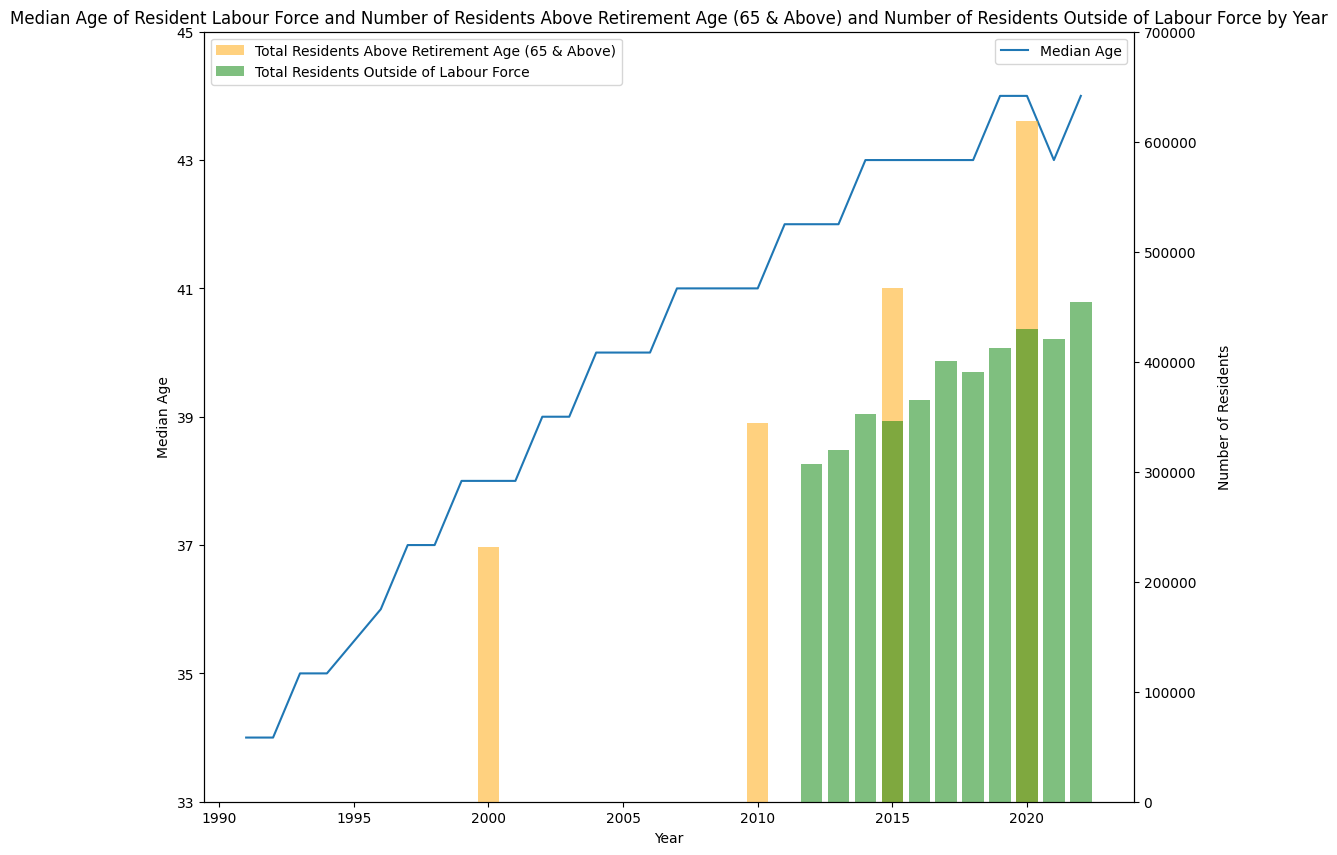

In [180]:
fig, ax = plt.subplots(figsize=(12, 10))

# initialise plotting data
ma_years = ma_df['year'].values
median_age = ma_df['median_age'].values
aa_years = [2000, 2010, 2015, 2020]
above_age = []
for i in [df2000, df2010, df2015, df2020]:
    above_age.append(int(i.iloc[-2, 0]) + int(i.iloc[-1, 0]))  # add the total for 65-69 and 70 & Over for each year
outside_years = lfr_t116.columns.values
outside = []
for k in range(len(lfr_t116.columns)):
    outside.append(int(lfr_t116.iloc[-2, k]) + int(lfr_t116.iloc[-1, k]))  # add the total for 65-69 and 70 & Over for each year

# plot line graph
ax.plot(ma_years, median_age, label='Median Age')

# customise plot
ax.set_xlabel('Year')
ax.set_ylabel('Median Age')
ax.set_xticks([year for year in range(1990, 2023, 5)])
ax.set_yticks([age for age in range(33, 46, 2)])
ax.legend(loc='upper right')

ax2 = ax.twinx()

# plot bar graph
ax2.bar(aa_years, above_age, color='orange', alpha=0.5, label='Total Residents Above Retirement Age (65 & Above)')
ax2.bar(outside_years, outside, color='green', alpha=0.5, label='Total Residents Outside of Labour Force')

# customise plot
ax2.set_ylabel('\nNumber of Residents')
ax2.set_yticks([number for number in range(0, 800000, 100000)])
ax2.legend(loc='upper left')

plt.title('Median Age of Resident Labour Force and Number of Residents Above Retirement Age (65 & Above) and Number of Residents Outside of Labour Force by Year')
plt.show()

## (e) Line and Bar Chart

### (i) JobVacancytoUnemployedPersonRatio.csv

In [181]:
# read dataset
# https://beta.data.gov.sg/datasets/d_25ef6b778f76dfc1fb17a2b0587eff7e/view
jvurdf = pd.read_csv('Data/JobVacancytoUnemployedPersonRatio.csv')[:-3]

# make a copy of the dataset and delete all rows
avg_jvurdf = jvurdf.copy()[0:0]

# change column heading 'quarter' to 'year'
avg_jvurdf = avg_jvurdf.rename(columns={'quarter': 'year'})

# loop through year
for i in range(0, len(jvurdf), 4):
    avg = 0
    # loop through each quarter of the year
    for j in range(4):
        # add the value of each quarter
        avg += jvurdf.iloc[i+j, 1]
    # calculate the average jv_to_ue and add it to the new dataframe
    avg_jvurdf.loc[len(avg_jvurdf)] = [f'Average for {jvurdf.iloc[i, 0][:4]}', avg/4]

avg_jvurdf

,year,jv_to_ue
0,Average for 2002,0.3575
1,Average for 2003,0.2675
2,Average for 2004,0.3950
3,Average for 2005,0.4700
4,Average for 2006,0.6575
5,Average for 2007,1.1100
6,Average for 2008,0.9200
7,Average for 2009,0.5225
8,Average for 2010,0.9850
9,Average for 2011,1.2125


In [182]:
# check for missing values
avg_jvurdf.isnull().sum()

year        0
jv_to_ue    0
dtype: int64

In [183]:
# view dataset data types
avg_jvurdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      21 non-null     object 
 1   jv_to_ue  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


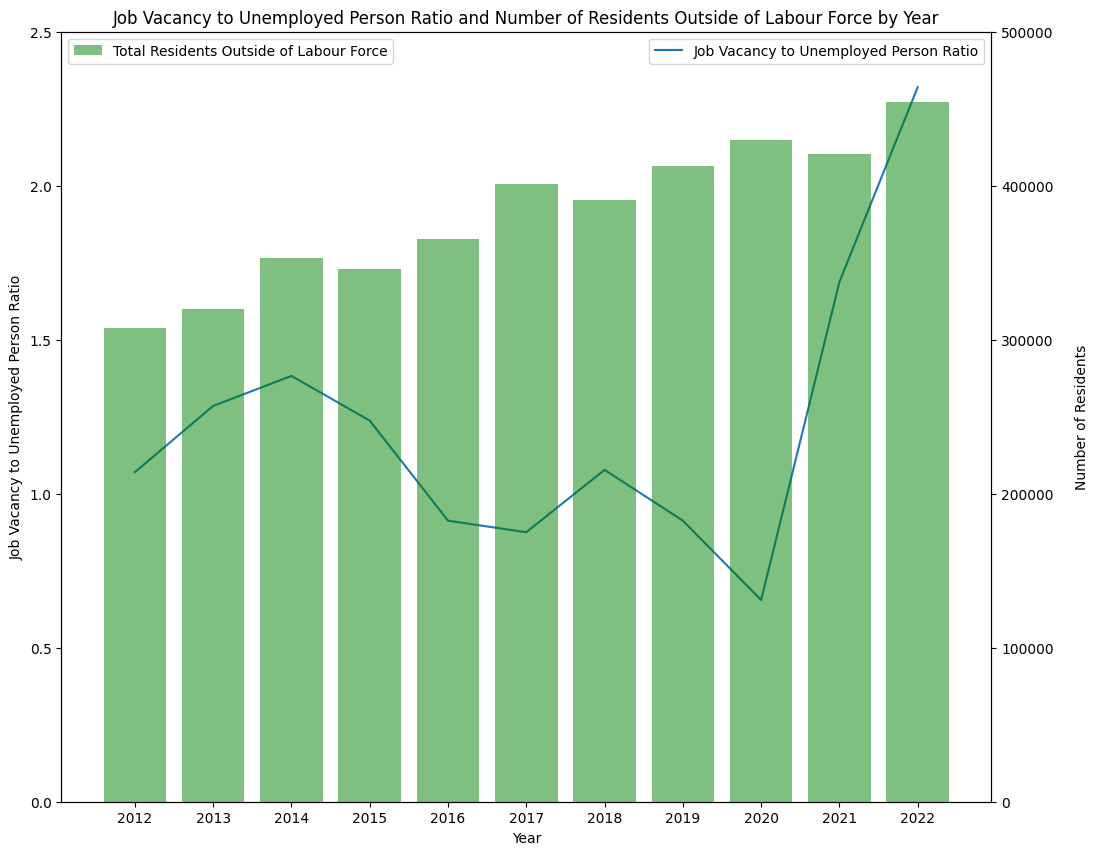

In [184]:
fig, ax = plt.subplots(figsize=(12, 10))

# initialise plotting data
outside_years = lfr_t116.columns.values
outside = []
for k in range(len(lfr_t116.columns)):
    outside.append(int(lfr_t116.iloc[-2, k]) + int(lfr_t116.iloc[-1, k]))  # add the total for 65-69 and 70 & Over for each year
jvur = []
for i in range(len(avg_jvurdf)):
    if int(avg_jvurdf.iloc[i, 0][-4:]) in outside_years:
        jvur.append(avg_jvurdf.iloc[i, 1])
        
# plot line graph
ax.plot(outside_years, jvur, label='Job Vacancy to Unemployed Person Ratio')

# customise plot
ax.set_xlabel('Year')
ax.set_ylabel('Job Vacancy to Unemployed Person Ratio')

ax.set_xticks(outside_years)
ax.set_ylim(0, 2.5)
ax.legend(loc='upper right')

ax2 = ax.twinx()

# plot bar graph
ax2.bar(outside_years, outside, color='green', alpha=0.5, label='Total Residents Outside of Labour Force')

# customise plot
ax2.set_ylabel('\nNumber of Residents')
ax2.set_yticks([number for number in range(0, 500001, 100000)])
ax2.legend(loc='upper left')

plt.title('Job Vacancy to Unemployed Person Ratio and Number of Residents Outside of Labour Force by Year')
plt.show()

## (f) Comparitive Line Graph

### (i) LFR2022_T97

(Number of Unemployed Residents By Highest Qualification By Year)

In [185]:
# read dataset
# https://stats.mom.gov.sg/Pages/Labour-Force-In-Singapore-2022.aspx
lfr_t97 = pd.read_excel('Data/LFR2022_T95_115.xlsx', sheet_name='T97')

# remove rows and columns that are not used
lfr_t97 = lfr_t97.iloc[5:12, 1:]

# set NaN value to 'Total'
lfr_t97.iloc[0, 0] = 'Total'

# reset index and drop the old index
lfr_t97 = lfr_t97.reset_index().drop(columns='index')

# set the first row to be the header
lfr_t97.columns = lfr_t97.iloc[0]

# remove the duplicative row
lfr_t97 = lfr_t97.iloc[1:]

# set first column to index
lfr_t97 = lfr_t97.set_index('Total')

# multiply by 1000
for col in lfr_t97.columns:
    lfr_t97[col] = lfr_t97[col].multiply(1000)

# set all values to int
lfr_t97 = lfr_t97.astype(int)

# set all columns to int
lfr_t97.columns = lfr_t97.columns.astype(int)

lfr_t97

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Total,,,,,,,,,,,
Total,79000,82600,81800,84500,92300,94400,89000,98100,122900,111200,87600
Below Secondary,18000,16600,14800,14200,15000,14100,12400,13500,18200,13400,9800
Secondary,16200,16100,14700,16200,16100,16100,13800,15900,19400,18900,14200
Post-Secondary (Non-Tertiary),10900,10000,9900,11300,10300,13100,12600,12100,18300,12200,12400
Diploma & Professional Qualification,13500,15500,15200,17400,18200,17400,18400,22800,29700,21400,18800
Degree,20500,24400,27200,25400,32600,33700,31800,33800,37200,45400,32299


In [186]:
# check for missing values
lfr_t97.isnull().sum()

0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [187]:
# view dataset data types
lfr_t97.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Total to Degree
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2012    6 non-null      int32
 1   2013    6 non-null      int32
 2   2014    6 non-null      int32
 3   2015    6 non-null      int32
 4   2016    6 non-null      int32
 5   2017    6 non-null      int32
 6   2018    6 non-null      int32
 7   2019    6 non-null      int32
 8   2020    6 non-null      int32
 9   2021    6 non-null      int32
 10  2022    6 non-null      int32
dtypes: int32(11)
memory usage: 312.0+ bytes


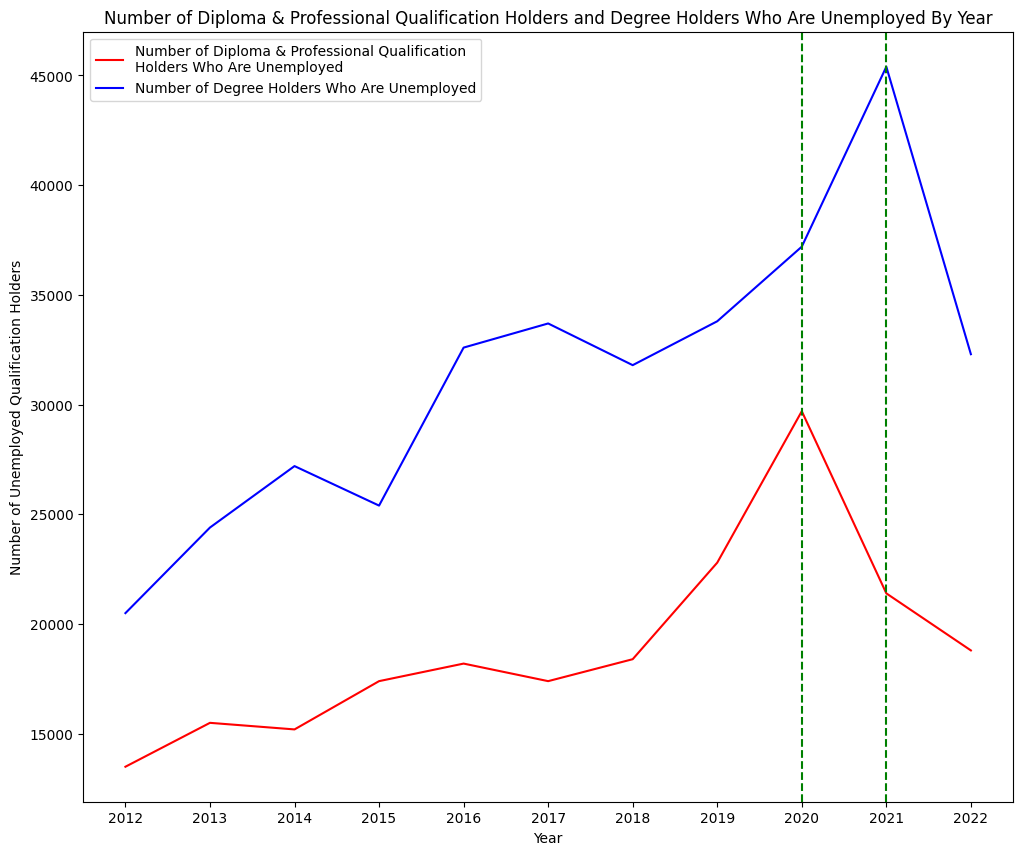

In [188]:
fig, ax = plt.subplots(figsize=(12, 10))

# plot line graph for unemployed
ax.plot(lfr_t97.columns, lfr_t97.iloc[-2, :], 'r-', label='Number of Diploma & Professional Qualification\nHolders Who Are Unemployed')
ax.plot(lfr_t97.columns, lfr_t97.iloc[-1, :], 'b-', label='Number of Degree Holders Who Are Unemployed')

# annotate plot
ax.axvline(x=2020, color='green', linestyle='--')
ax.axvline(x=2021, color='green', linestyle='--')

# customise plot
ax.set_title('Number of Diploma & Professional Qualification Holders and Degree Holders Who Are Unemployed By Year')
ax.set_ylabel('Number of Unemployed Qualification Holders')
ax.set_xlabel('Year')
ax.set_xticks(lfr_t97.columns)

plt.legend()
plt.show()